## This note book is for evaluate the perfermance of the Agglomerative clustring with changing the size of KDDCUP99 dataset from 1000 to 20000


## Import libraries

In [8]:
from sklearn.datasets import fetch_kddcup99
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 

## Data preprocessing

In [9]:
#Load just 10% of the full data, because it's massive around 5 millons samples
kddData = fetch_kddcup99(percent10=True)
xData = kddData.data
yData = kddData.target

#Convert the data to data frame
xDf = pd.DataFrame(xData)
yDf = pd.DataFrame(yData)

#For replaces strings with an incrementing integer, we will use LabelEncoder of the preprocessing module
xDf = xDf.apply(pd.to_numeric, errors='ignore')#return float64 or int64 dtype depending on the data supplied
for column in xDf.columns:
    if xDf[column].dtype == object:
        xle = LabelEncoder()
        xDf[column] = xle.fit_transform(xDf[column])

#Show the new dataFrame xDf (after converting the string)
# All strings removed.
xDf.head(5)

#Replaces strings with an incrementing integer in the xDf dataframe
yle = LabelEncoder()
yDf = pd.DataFrame(yle.fit_transform(yDf))

#Shuffle the data 
shuffledIndex = np.random.permutation(len(xDf))
xDf = xDf.iloc[shuffledIndex]
yDf = yDf.iloc[shuffledIndex]

#Convert dataframe to array
X = xDf.values
y = yDf.values

#Normalise the X data
scaler = MinMaxScaler(feature_range=(-1,1))
xNormalised = scaler.fit_transform(X)



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### We will use a for Loop, for repeat the process for different size of dataset.

In [10]:
KList = [] #List of the optimal number of clusters
purityKList = [] #List of the purity of train datast with k clusters
purityKTList = [] #List of the purity of test datast with k clusters
trainTimeKL = [] #List of train time for the model with k clusters
for i in range(1,21):
  
  #The new dataframes
  nbrSamples = i * 1000 #the size of the data from 10000 to 100000
  myX = xNormalised[:nbrSamples]
  myY = y[:nbrSamples]

  #Convert dataframes to arrays
  #80% for training and 20% for the test
  percent80 = int(nbrSamples * 0.8)
  xTrain = myX[:percent80]  
  xTest = myX[percent80:]
  yTrain = myY[:percent80]  
  yTest = myY[percent80:]

  #============================================================================
  '''Calculate the silhouette coefficient for all the possible values
  of K in the range 2-> 29 for finding the optimal number of clusters 
  that correspond to the maximum silhouette coefficient '''

  #List for gather the silhouette scores
  silhouetteScores = []
  for nbrClusters in range(2,26):
    #Applying the aglomerative clustring model
    ACModel = AgglomerativeClustering(n_clusters=nbrClusters ,affinity='euclidean')

    #Using %time for getting the training time
    yPred = ACModel.fit_predict(xTrain)

    #Calculate the silhouette coefficient
    silhouetteScore = silhouette_score(xTrain, yPred)

    silhouetteScores.append(silhouetteScore)
    
  #The optimal number of clusters K
  #The maximun Silhouette coefficient
  maxScore = max(silhouetteScores)

  #The index of the maximum coefficient
  indexMax = silhouetteScores.index(maxScore)

  #The optimal number of clusters K
  K = indexMax + 2
  KList.append(K)
  #=============================================================================
  #Applying AC algorithm with K clusters for calculating the purity
  ACModel = AgglomerativeClustering(n_clusters=K ,affinity='euclidean')
  t0 = time.time()
  yPred = ACModel.fit_predict(xTrain)
  t1 = time.time()
  t = t1-t0 #the time for train the model
  trainTimeKL.append(t)
  #Calculating the confusion matrix
  CM = confusion_matrix(yTrain, yPred)
  #Calculating the  purity
  purityK = (CM.max(axis=1).sum())/len(xTrain)
  purityK = round(purityK, 4)*100
  purityKList.append(purityK)

  #Calculating the purity for the test data
  yPredT = ACModel.fit_predict(xTest)
  #Calculating the confusion matrix
  CM = confusion_matrix(yTest, yPredT)
  #Calculating the  purity
  purityKT = (CM.max(axis=1).sum())/len(xTest)
  purityKT = round(purityKT, 4)*100
  purityKTList.append(purityKT)

## Plotting the result with different sizes of the dataset:

*   Plotting the optimal number of clusters K.
*   Plotting the training time.
*   Plotting the training purity
*   plotting the test purity





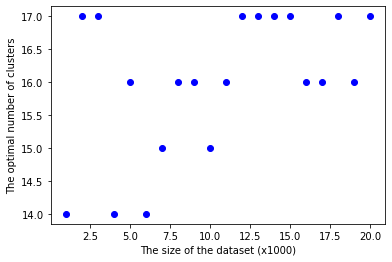

In [24]:
#Plotting the optimal number of clusters K
X = np.arange(1,21)
plt.scatter(X, KList, c='b')
plt.xlabel('The size of the dataset (x1000)')
plt.ylabel('The optimal number of clusters')
plt.show()

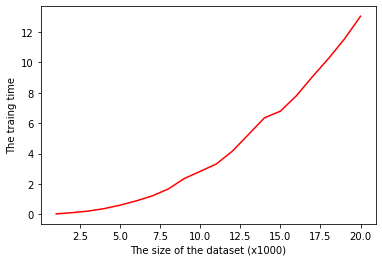

In [23]:
#Plotting the training time of the AC model
plt.plot(X, trainTimeKL, c='r')
plt.xlabel('The size of the dataset (x1000)')
plt.ylabel('The traing time')
plt.show()

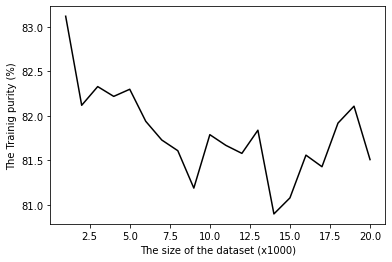

In [15]:
#Plotting the training purity
plt.plot(X, purityKList, c='k')
plt.xlabel('The size of the dataset (x1000)')
plt.ylabel('The Trainig purity (%)')
plt.show()

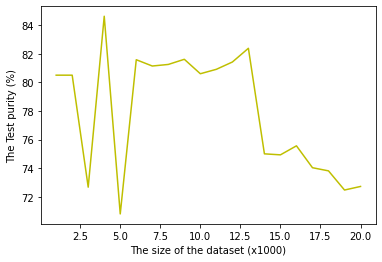

In [16]:
#Plotting the test purity
plt.plot(X, purityKTList, c='y')
plt.xlabel('The size of the dataset (x1000)')
plt.ylabel('The Test purity (%)')
plt.show()